In [1]:
import os
import nibabel as nib
import cv2 
import numpy as np
import math
import matplotlib.pyplot as plt

def overlay_mask_on_image2(image, mask, color=(255, 0, 0)):
    # Create a 3-channel version of the grayscale image
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Identify where the mask is active
    active_pixels = (mask > 0)

    # Apply color to the active mask regions in the image
    color_image[active_pixels] = color

    return color_image


def visualize2(image, mask, color=(255, 0, 0)):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    overlay = overlay_mask_on_image2(image, mask, color=color)
    plt.subplot(1, 3, 3)
    plt.imshow(overlay, cmap='gray')
    plt.title('Overlayed mask on image')
    plt.axis('off')

    plt.show()

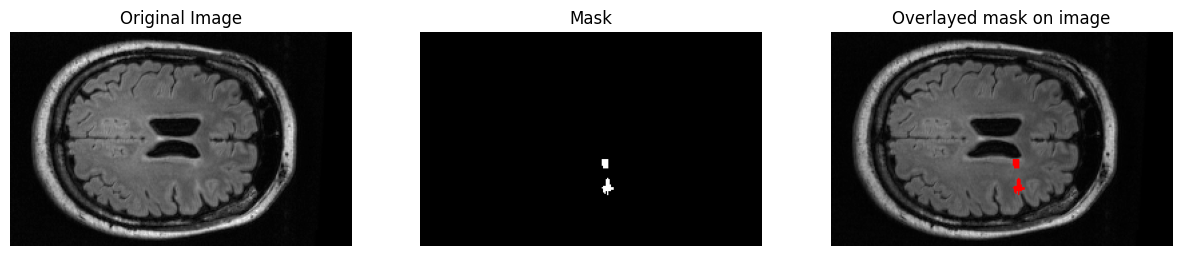

Contorno 0 de tamaño 24: [[[140 109]]

 [[139 110]]

 [[139 114]]

 [[138 115]]

 [[137 115]]

 [[136 116]]]
Contorno 1 de tamaño 6: [[[136  95]]

 [[136  99]]

 [[137 100]]

 [[137 101]]

 [[140 101]]

 [[140  95]]]
Cantidad de Imágenes: 256
Contorno: (array([[[140, 109]],

       [[139, 110]],

       [[139, 114]],

       [[138, 115]],

       [[137, 115]],

       [[136, 116]],

       [[137, 117]],

       [[137, 119]],

       [[138, 120]],

       [[138, 119]],

       [[139, 118]],

       [[140, 119]],

       [[140, 121]],

       [[140, 119]],

       [[141, 118]],

       [[142, 118]],

       [[143, 117]],

       [[144, 117]],

       [[144, 116]],

       [[143, 116]],

       [[142, 115]],

       [[142, 114]],

       [[141, 113]],

       [[141, 110]]], dtype=int32), array([[[136,  95]],

       [[136,  99]],

       [[137, 100]],

       [[137, 101]],

       [[140, 101]],

       [[140,  95]]], dtype=int32))


In [2]:
path = "/home/mario/VSCode/Dataset/ds-epilepsy"
file_original = os.path.join(path, "T2FLAIR", "sub-00033_acq-tse3dvfl_FLAIR.nii.gz")
file_roi = os.path.join(path, "ROI_T2", "sub-00033_acq-tse3dvfl_FLAIR_roi.nii.gz")
"""
file_aug = os.path.join(path, "T2FLAIR", "sub-00090_study_brightness.nii.gz")
file_roi_aug = os.path.join(path, "ROI_T2", "sub-00090_roi_brightness.nii.gz")
im_aug = np.uint8(nib.load(file_aug).get_fdata()[:, :, 25])
roi_aug = np.uint8(nib.load(file_roi_aug).get_fdata()[:, :, 25])
visualize2(image=im_aug,
           mask=roi_aug)
"""

im = np.uint8(nib.load(file_original).get_fdata()[:, :, 175])
roi = np.uint8(nib.load(file_roi).get_fdata()[:, :, 175])


visualize2(image=im,
           mask=roi)


contours_original, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
a = [contour for contour in contours_original if len(contour)>6]

for i, contour in enumerate(contours_original):
    print(f"Contorno {i} de tamaño {len(contour)}: {contour[range(0, 6)]}") 
print(f"Cantidad de Imágenes: {nib.load(file_original).get_fdata().shape[2]}")
print(f"Contorno: {contours_original}")

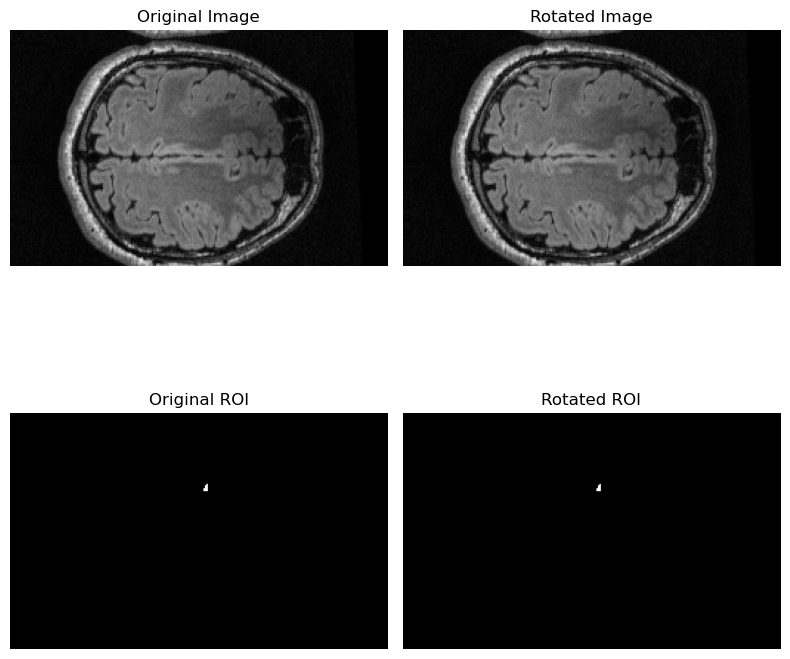

Contorno original: (array([[[133,  48]],

       [[132,  49]],

       [[132,  50]],

       [[131,  51]],

       [[131,  52]],

       [[133,  52]]], dtype=int32),) 
Contorno rotado: (array([[[133,  48]],

       [[132,  49]],

       [[132,  50]],

       [[131,  51]],

       [[131,  52]],

       [[133,  52]]], dtype=int32),)
[[133.           8.        ]
 [132.           8.16666667]
 [132.           8.33333333]
 [131.           8.5       ]
 [131.           8.66666667]
 [133.           8.66666667]]


In [31]:
path = "/home/mario/VSCode/Dataset/ds-epilepsy"
file_original = os.path.join(path, "T2FLAIR", "sub-00033_acq-tse3dvfl_FLAIR.nii.gz")
file_roi = os.path.join(path, "ROI_T2", "sub-00033_acq-tse3dvfl_FLAIR_roi.nii.gz")
"""
file_aug = os.path.join(path, "T2FLAIR", "sub-00090_study_brightness.nii.gz")
file_roi_aug = os.path.join(path, "ROI_T2", "sub-00090_roi_brightness.nii.gz")
im_aug = np.uint8(nib.load(file_aug).get_fdata()[:, :, 25])
roi_aug = np.uint8(nib.load(file_roi_aug).get_fdata()[:, :, 25])
visualize2(image=im_aug,
           mask=roi_aug)
"""

im = np.uint8(nib.load(file_original).get_fdata()[:, :, 175])
roi = np.uint8(nib.load(file_roi).get_fdata()[:, :, 175])


visualize2(image=im,
           mask=roi)


contours_original, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
a = [contour for contour in contours_original if len(contour)>6]

for i, contour in enumerate(contours_original):
    print(f"Contorno {i} de tamaño {len(contour)}: {contour[range(0, 6)]}") 
print(f"Cantidad de Imágenes: {nib.load(file_original).get_fdata().shape[2]}")
print(f"Contorno: {contours_original}")

In [ ]:
path_base = os.path.join(path, "T2FLAIR-ds-epilepsy", "labels", "train", "sub-00033_acq-tse3dvfl_FLAIR.nii.gz")

### Data Loader - Convertir .nii.gz a imágenes PNG o JPEG2000

Workflow actual: 

1. Convertir el estudio dado a .nii. La carpeta del estudio dado debe tener en su interior carpetas con el nombre del paciente "sub-00XXXX" y, dentro de esas carpetas, debe estar el archivo .nii.gz. Se puede dar como argumento un .txt con rodajas que se excluirán de convertir a .nii. 
2. Realizar el hold-out de los datos. Los archivos .nii dedicados a train, val y test serán guardados en 3 archivos .txt. Estos archivos serán recibidos como entrada en la función que convierte los archivos .nii a PNG (paso 3) y las redirigirá a sus respectivas carpetas. 
3. Convertir el estudio en .nii a un formato sin pérdidas. Se ha implementado una normalización provisional dentro de este método. En un futuro, cuando se aplique un preprocesamiento a las rodajas del archivo .nii.gz, esta normalización ya vendrá dada. 

**Detalles**

- La función que se encarga de convertir las imágenes a PNG y moverlas a los directorios de train/val/test especificados por el holdout recibe como entrada un archivo .txt con los detalles de todos los paths donde puede encontrar la información. Este txt debe tener un formato como:
```bash
niiFolder: /home/mariopasc/Python/Datasets/ds-epilepsy/T2flair-study-nii
trainFolder: /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/images/train
trainNiiFiles: /home/mariopasc/Python/Projects/BSC_final/epilepsy-displasia-focal-segmentation/text-info-files/t2flair-study/holdout/train_files.txt
valFolder: /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/images/val
valNiiFIles: /home/mariopasc/Python/Projects/BSC_final/epilepsy-displasia-focal-segmentation/text-info-files/t2flair-study/holdout/val_files.txt
testFolder: /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/images/test
testNiiFiles: /home/mariopasc/Python/Projects/BSC_final/epilepsy-displasia-focal-segmentation/text-info-files/t2flair-study/holdout/test_files.txt
format: PNG
```

In [2]:
from ultralytics import YOLO
yaml = "/home/mariopasc/Python/Projects/BSC_final/epilepsy-displasia-focal-segmentation/info-files/t2flair-study/config.yaml"
model = YOLO(model = "yolov8n-seg.pt",
             task='segment')
results_train = model.train(data=yaml, epochs=2, imgsz=640, project="a" ,
                                         save=True, save_period=1,
                                         name="Yolov8-Train", verbose=True,
                                         seed=42, single_cls=True, plots=False,
                                         augment=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, degrees=0.0, translate=0.0,
                                         scale=0.0, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.0, mosaic=0.0,
                                         close_mosaic=0, mixup=0.0, copy_paste=0.0, auto_augment="", erasing=0.0, val=False)
results_val = model.val(data=yaml, imgsz=640, conf=0.001, plots=True, save_json=True)

100%|██████████| 6.73M/6.73M [00:00<00:00, 7.07MB/s]


New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.8.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/home/mariopasc/Python/Projects/BSC_final/epilepsy-displasia-focal-segmentation/info-files/t2flair-study/config.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=a, name=Yolov8-Train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visua

100%|██████████| 6.23M/6.23M [00:00<00:00, 7.04MB/s]
/home/mariopasc/Python/miniconda3/envs/torch_env/lib/python3.8/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/labels/train... 2692 images, 3741 backgrounds, 0 corrupt: 100%|██████████| 6433/6433 [00:01<00:00, 4190.22it/s]


train: New cache created: /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/labels/train.cache


val: Scanning /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/labels/val... 1374 images, 1842 backgrounds, 0 corrupt: 100%|██████████| 3216/3216 [00:00<00:00, 3763.54it/s]

val: New cache created: /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/labels/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to a/Yolov8-Train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2      2.76G      2.339      3.675      9.086      1.554          1        640: 100%|██████████| 403/403 [00:53<00:00,  7.56it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2      2.66G      1.666      2.503      2.758      1.197          0        640: 100%|██████████| 403/403 [00:51<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:09<00:00, 11.20it/s]

                   all       3216       1556      0.655      0.374      0.411      0.239      0.651      0.364      0.402       0.19



2 epochs completed in 0.032 hours.
Optimizer stripped from a/Yolov8-Train/weights/last.pt, 6.8MB
Optimizer stripped from a/Yolov8-Train/weights/best.pt, 6.8MB

Validating a/Yolov8-Train/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.8.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:07<00:00, 14.09it/s]


                   all       3216       1556      0.656      0.374      0.411       0.24      0.654      0.364      0.403      0.191
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Ultralytics YOLOv8.1.25 🚀 Python-3.8.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /home/mariopasc/Python/Datasets/t2flair-yolov8-ds/labels/val.cache... 1374 images, 1842 backgrounds, 0 corrupt: 100%|██████████| 3216/3216 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 201/201 [00:54<00:00,  3.69it/s]


                   all       3216       1556      0.655      0.373      0.413       0.24      0.648      0.369      0.405      0.197
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Saving a/Yolov8-Train2/predictions.json...
Results saved to a/Yolov8-Train2


In [11]:
results_val.confusion_matrix.matrix[0][1]

58.0